<a href="https://colab.research.google.com/github/Raajarapu/COLAB_practice/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement for Random Forest Classifier
Objective: To develop a Random Forest Classifier model to predict the car evaluation category (unacc, acc, good, vgood) based on various attributes such as buying price, maintenance cost, number of doors, passenger capacity, luggage boot size, and safety rating. The goal is to accurately classify the cars into their respective categories using the features provided.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df5 = pd.read_csv("car_evaluation.csv")
df5

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
df5.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df5.tail()

,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df5.shape

(1727, 7)

In [ ]:
df5.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [ ]:
df5.isna().sum()

,0
vhigh,0
vhigh.1,0
2,0
2.1,0
small,0
low,0
unacc,0


In [ ]:
def show(data):
  for i in data.columns[1:]:
    print("Feature: {} with {} Levels".format(i,data[i].unique()))

show(df5)

Feature: vhigh.1 with ['vhigh' 'high' 'med' 'low'] Levels
Feature: 2 with ['2' '3' '4' '5more'] Levels
Feature: 2.1 with ['2' '4' 'more'] Levels
Feature: small with ['small' 'med' 'big'] Levels
Feature: low with ['med' 'high' 'low'] Levels
Feature: unacc with ['unacc' 'acc' 'vgood' 'good'] Levels
Feature: class_num with [nan] Levels


In [ ]:
df5['small'].value_counts()

,count
small,
1,576
0,576
2,575


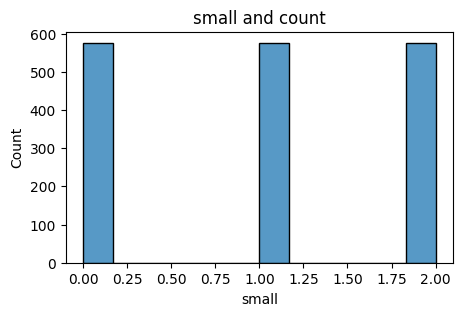

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(df5['small'])
plt.title("small and count")
plt.show()

In [ ]:
df5['low'].value_counts()

,count
low,
2,576
0,576
1,575


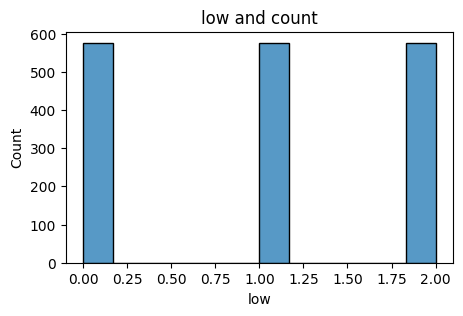

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(df5['low'])
plt.title("low and count")
plt.show()

In [ ]:
df5['unacc'].value_counts()

,count
unacc,
2,1209
0,384
1,69
3,65


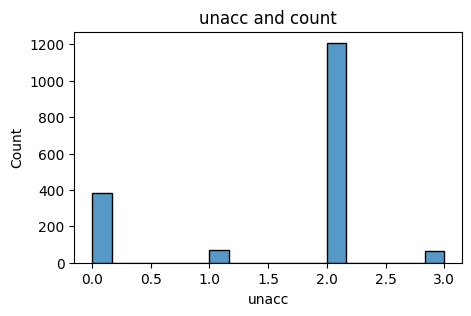

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(df5['unacc'])
plt.title("unacc and count")
plt.show()

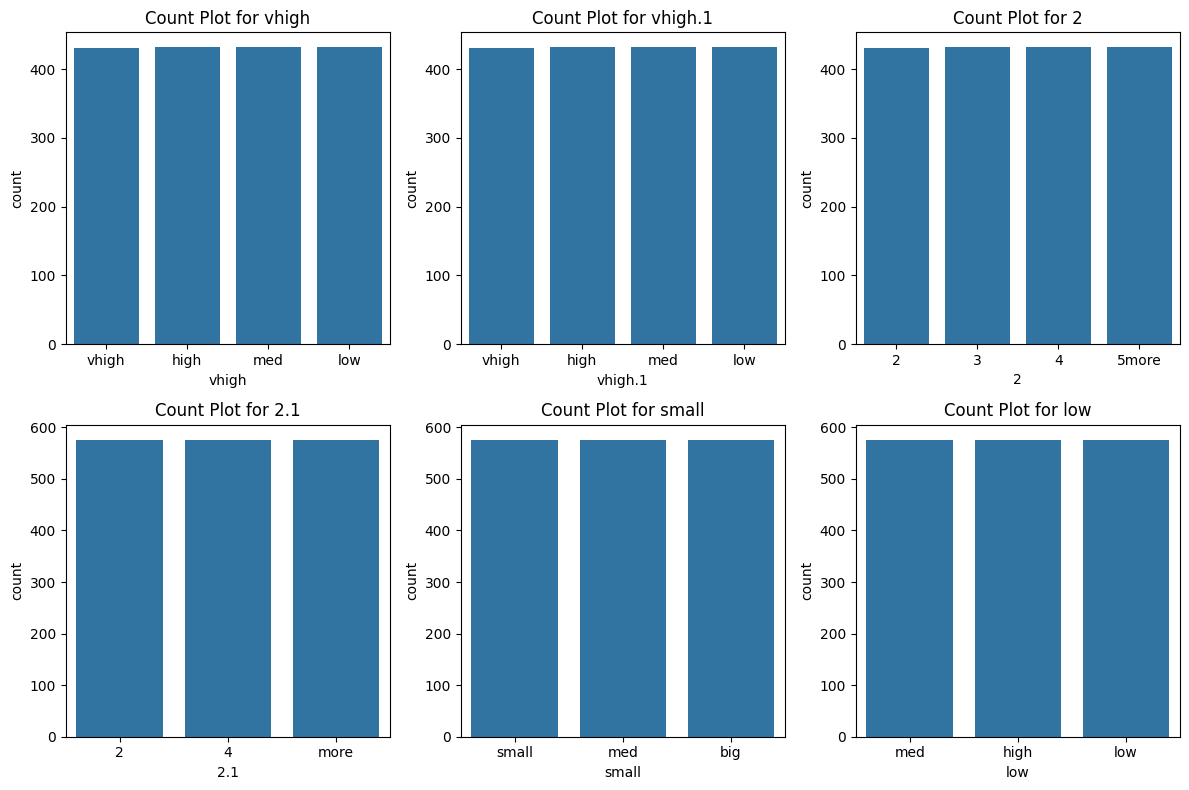

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plots for categorical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(df5.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df5, x=column)
    plt.title(f'Count Plot for {column}')

plt.tight_layout()
plt.show()


# Pair plot
## Create pair plots to visualize relationships between features and the target variable.

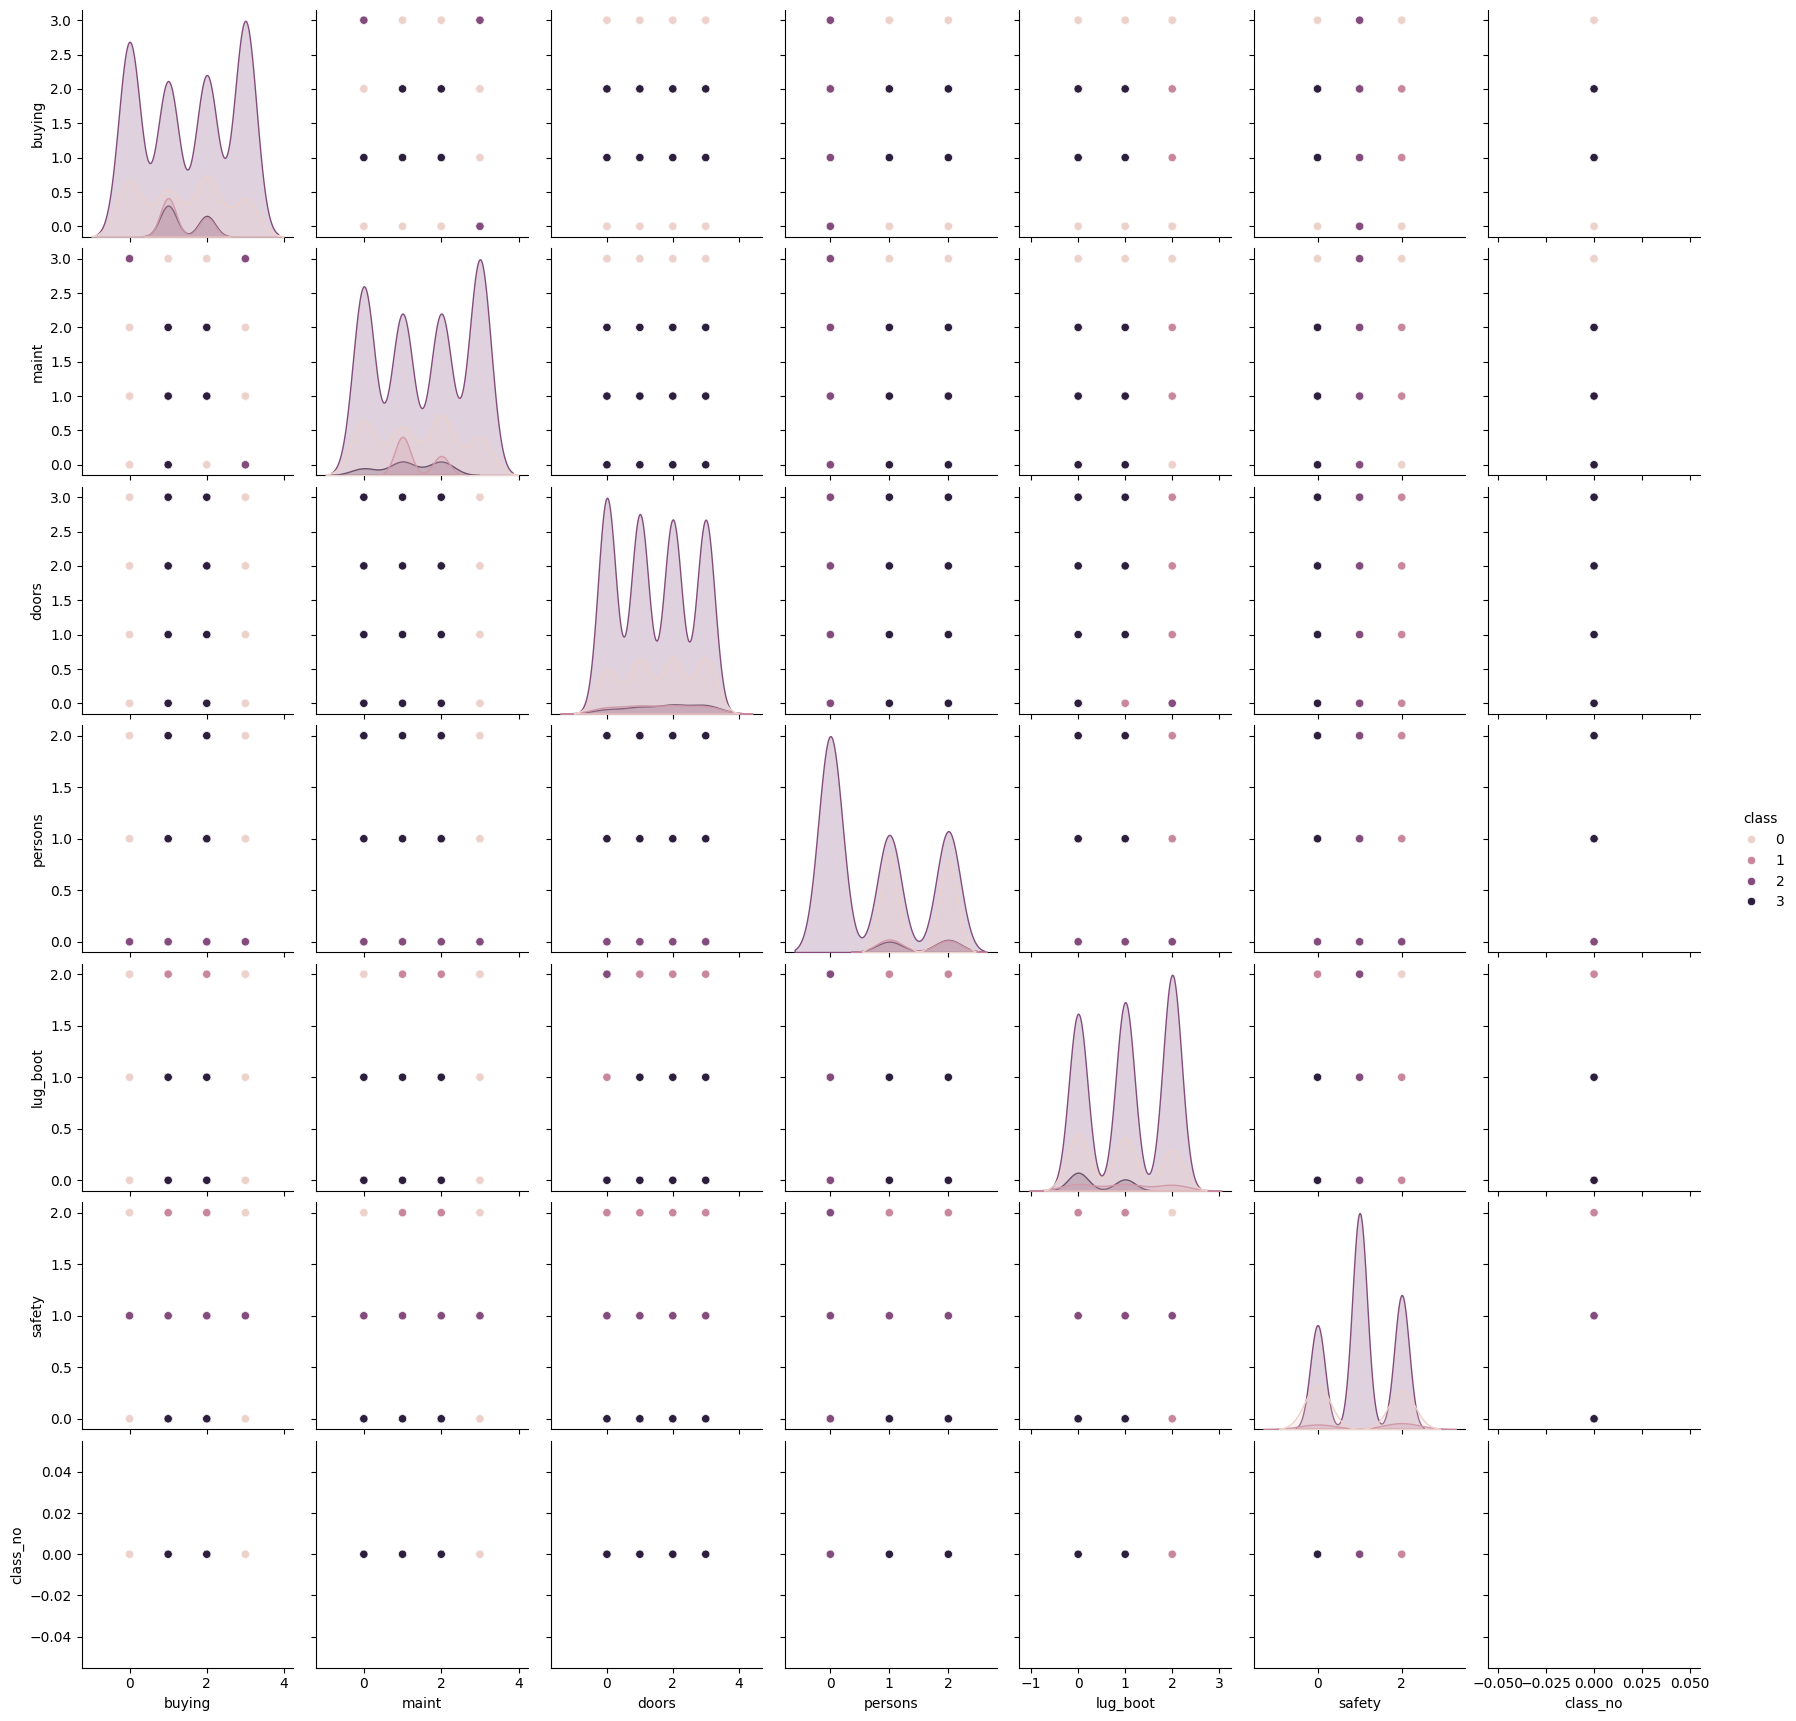

In [ ]:
# Pair plot for visualizing relationships
sns.pairplot(df5, hue='class')
plt.show()

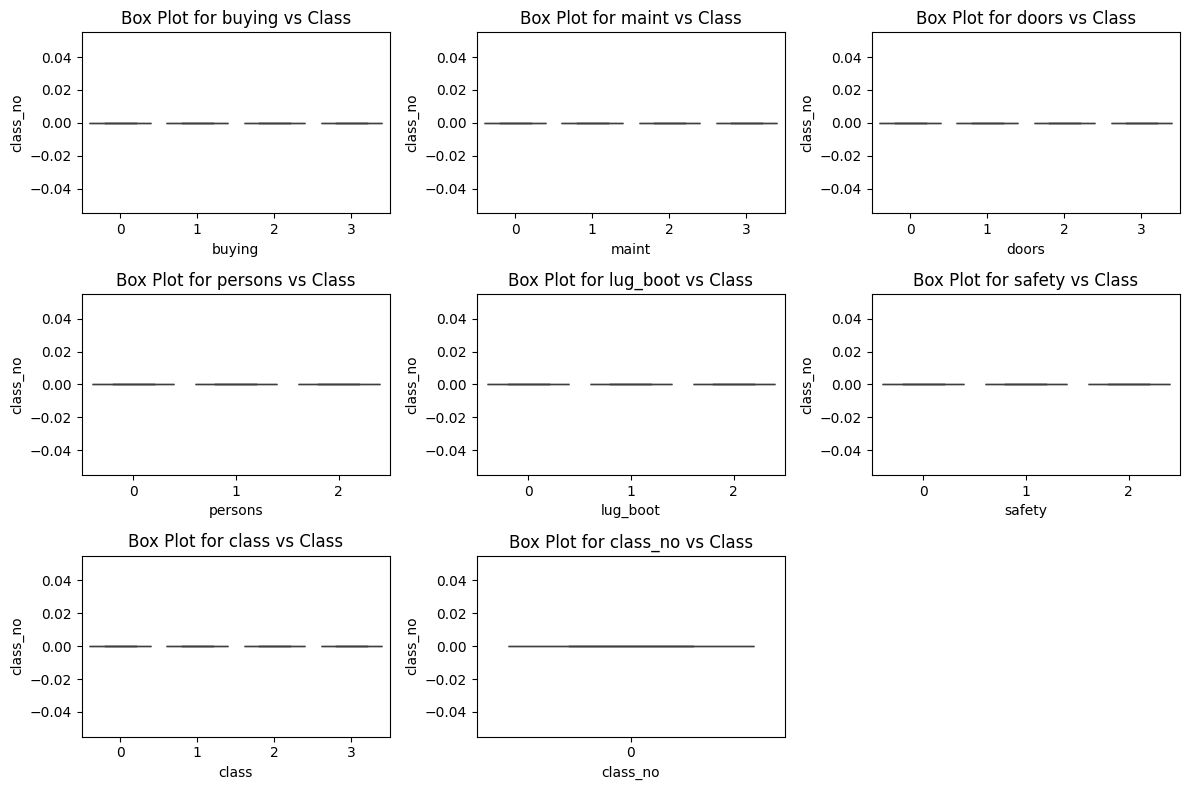

In [ ]:
# Transform 'class' to numerical values
class_mapping = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
df5['class_num'] = df5['class'].map(class_mapping)

# Box plots for each feature vs. class
plt.figure(figsize=(12, 8))
for i, column in enumerate(df5.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df5, x=column, y='class_no')
    plt.title(f'Box Plot for {column} vs Class')

plt.tight_layout()
plt.show()

In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class', 'class_no']
df5.columns = col_names
col_names

['buying',
 'maint',
 'doors',
 'persons',
 'lug_boot',
 'safety',
 'class',
 'class_no']

In [ ]:
X = df5.drop('class', axis = 1)
y = df5['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [ ]:
# encode categorical variables with ordinal
!pip install category_encoders
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.4 MB/s eta 0:00:00


In [ ]:
df5.head()

,buying,maint,doors,persons,lug_boot,safety,class,class_no
0,3,3,0,0,2,2,2,0
1,3,3,0,0,2,0,2,0
2,3,3,0,0,1,1,2,0
3,3,3,0,0,1,2,2,0
4,3,3,0,0,1,0,2,0


In [ ]:
# Load the dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
df_encoded = encoder.fit_transform(df5)

# Random Forest classifier

In [ ]:
# Building a model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
# Accuracy
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")

Accuracy:0.8842592592592593


In [ ]:
# condusion matrix
print(f"Confusion MAtrix:\n {confusion_matrix(y_test, y_pred)}")

Confusion MAtrix:
 [[ 74   1  14   0]
 [ 16   7   0   0]
 [ 12   0 291   0]
 [  6   1   0  10]]


In [ ]:
# classification report
print(f"Classification report: \n\n {classification_report(y_test, y_pred)}")

Classification report: 

               precision    recall  f1-score   support

           0       0.69      0.83      0.75        89
           1       0.78      0.30      0.44        23
           2       0.95      0.96      0.96       303
           3       1.00      0.59      0.74        17

    accuracy                           0.88       432
   macro avg       0.85      0.67      0.72       432
weighted avg       0.89      0.88      0.88       432




# Conclusion for Random Forest Classifier
By applying the Random Forest Classifier to the Car Evaluation dataset, we successfully classified the cars into their respective categories with high accuracy. The model leveraged the ensemble learning technique of Random Forest to handle the complexity and variability in the data. This resulted in robust and reliable predictions, demonstrating the effectiveness of the model in classifying cars based on their attributes. The feature importance analysis provided insights into the most influential factors for car evaluation, aiding in better decision-making for potential buyers and manufacturers.

# Random Forest Regressor

# Problem Statement for Random Forest Regressor
Objective: To develop a Random Forest Regressor model to predict the car evaluation score based on various attributes such as buying price, maintenance cost, number of doors, passenger capacity, luggage boot size, and safety rating. The goal is to accurately predict the evaluation score, which represents the overall quality of the car, based on the features provided.

In [ ]:
# Building a model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score

In [ ]:
me = np.mean(y_test - y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mpe = np.mean((y_test - y_pred)/y_test)*100
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
print(f"Mean Error (ME): {me}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Percentage Error (MPE): {mpe}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Error (ME): 0.02796296296296296
Mean Absolute Error (MAE): 0.19856481481481478
Mean Squared Error (MSE): 0.17327268518518515
Root Mean Squared Error (RMSE): 0.416260357450941
Mean Percentage Error (MPE): -inf
Mean Absolute Percentage Error (MAPE): inf


In [ ]:
# r-squared
r2 = r2_score(y_test, y_pred)
print(f"R_squared: {r2}")

R_squared: 0.7643362173507462


In [ ]:
# Additional Statistical Metrics
import statsmodels.api as sm
X_const = sm.add_constant(X_test)
ols_model = sm.OLS(y_test, X_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     6.991
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           4.18e-07
Time:                        03:39:19   Log-Likelihood:                -526.22
No. Observations:                 432   AIC:                             1066.
Df Residuals:                     425   BIC:                             1095.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4016      0.223     10.785      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


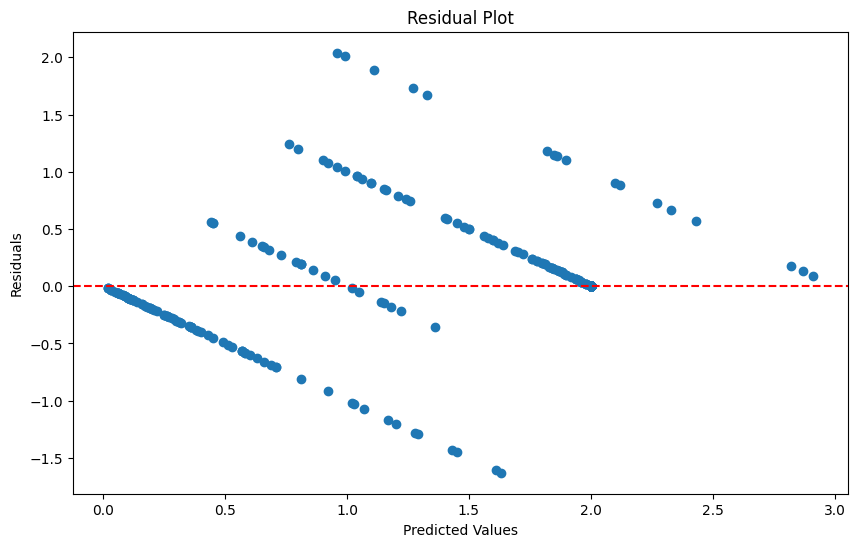

In [ ]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-Validation
cv_scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-Validation RMSE: {np.mean(cv_rmse_scores)}')


Cross-Validation RMSE: 0.48489639420097375


# Conclusion for Random Forest Regressor
By applying the Random Forest Regressor to the Car Evaluation dataset, we successfully predicted the car evaluation scores with high precision. The model effectively captured the relationships between the car attributes and their evaluation scores, resulting in accurate and reliable predictions. The ensemble nature of Random Forest helped in reducing overfitting and provided a robust model performance. The evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared indicated the model's efficiency in predicting car evaluation scores. This approach enables manufacturers and buyers to make informed decisions based on predicted car quality.